In [1]:
import itertools
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing import image
from pathlib import Path
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report


In [8]:
model = load_model(r"\\wsl$\Ubuntu\home\guilo\nsfw_model\nsfw.299x299.h5")
test_dir = 'C:\\Users\\guilo\\mba-tcc\\data\\validate'
image_size = 299
x_test = []
y_test = []
file_count = 0
update_frequency = 1000

In [4]:
class_names = ['not_safe', 'safest']

In [9]:
for image_file in Path(test_dir).glob("**/*.jpg"):
    file_count += 1
    # Load the current image file
    image_data = image.load_img(image_file, target_size=(image_size, image_size))

    # Convert the loaded image file to a numpy array
    image_array = image.img_to_array(image_data)
    image_array /= 255

    # Add to list of test images
    x_test.append(image_array)
    
    # Now add answer derived from folder
    path_name = os.path.dirname(image_file)
    folder_name = os.path.basename(path_name)
    y_test.append(class_names.index(folder_name))

    if file_count % update_frequency == 0:
        print("Processed " + str(file_count) + " - Current Folder: " + folder_name + " - Path Name: " + path_name)

Processed 1000 - Current Folder: not_safe - Path Name: C:\Users\guilo\mba-tcc\data\validate\not_safe
Processed 2000 - Current Folder: not_safe - Path Name: C:\Users\guilo\mba-tcc\data\validate\not_safe
Processed 3000 - Current Folder: not_safe - Path Name: C:\Users\guilo\mba-tcc\data\validate\not_safe
Processed 4000 - Current Folder: safest - Path Name: C:\Users\guilo\mba-tcc\data\validate\safest
Processed 5000 - Current Folder: safest - Path Name: C:\Users\guilo\mba-tcc\data\validate\safest
Processed 6000 - Current Folder: safest - Path Name: C:\Users\guilo\mba-tcc\data\validate\safest


In [16]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.get_cmap('Blues')):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [12]:
x_test = np.array(x_test)
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

In [67]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    not_safe       0.92      0.89      0.90      3000
      safest       0.89      0.92      0.91      3000

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



In [13]:
x_test.shape

(6000, 299, 299, 3)

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

Normalized confusion matrix
[[0.89 0.11]
 [0.08 0.92]]


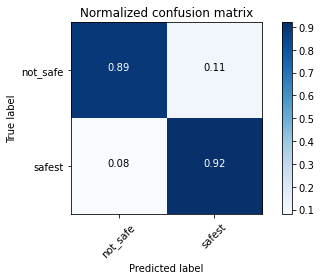

In [17]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

----

In [56]:
def predict_single_image(image_path):
    
    image_data = image.load_img(image_path, target_size=(image_size, image_size))
    image_array = image.img_to_array(image_data)
    image_array /= 255

    plt.imshow(image_array);
    plt.axis('off');

    x_train = []
    x_train.append(image_array)
    x_test = np.array(x_train)

    predictions = model.predict(x_test)
    print(f'Not Safe: {round(predictions[0][0]*100, 2)}%')
    print(f'Safe: {round(predictions[0][1]*100, 2)}%')

Not Safe: 0.07%
Safe: 99.93%


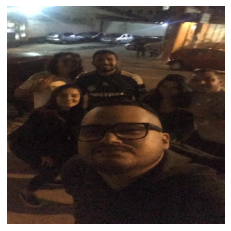

In [65]:
predict_single_image(r'C:\\Users\\guilo\\mba-tcc\\data\\WhatsApp Image 2020-10-03 at 21.37.01.jpeg')